# Adv Big Data HW 6 Summary of article using NN in forcasting stock prices

### **Article: "Stock Buy/Sell Prediction Using Convolutional Neural Network"** by: Asutosh Nayak
### source: https://towardsdatascience.com/stock-market-action-prediction-with-convnet-8689238feae3
### github for article: https://github.com/DarkKnight1991/stock_cnn_blog_pub/

### **Article is based on a paper called "Algorithmic Financial Trading with Deep Convolutional Neural Networks: Time Series to Image Conversion Approach"**
### source: https://www.researchgate.net/publication/324802031_Algorithmic_Financial_Trading_with_Deep_Convolutional_Neural_Networks_Time_Series_to_Image_Conversion_Approach

## I found the article and research paper very interesting. The article is great at summarizing the paper and providing examples but there are certain aspects that I don't fully understand.

### From the article:

## **1) What does the paper say?** --> Researchers took a time series problem and turned it into an image classification problem which is really awesome.
* first they calculated 15 different technical indicators over 15 different periods for each day in the training data
* next, convert the 225 (15 x 15) features into 15 x 15 images
* then, label the data as "buy", "sell" or "hold" based on an algorithm the researchers provided in the paper
* finally, they trained a CNN like any other image classification problem

## ** Feature Engineering ** was mostly comprised of calculating a range of technical indicators such as Simple Moving Averages

ex: Below is an image from the article that show the calculation of a 6 day simple moving average, from there the researchers would calculate another 14 SMA's so they would end up with 6, 7, 8, ..., 20 day SMA's

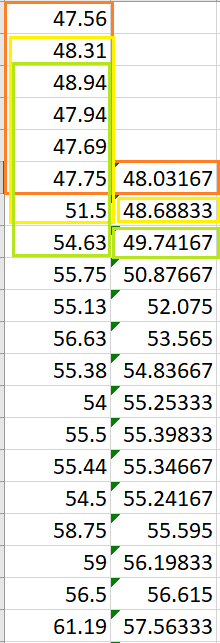

This approach of a sliding window is used to create as many technical indicators as they need, but its also how they would train and test the CNN

After this feature engineering we should have 225 new features and if you reshape them into a 15 x 15 array  we get an image.

**It is important to note that we need to keep related technical indicators spatially close** --> Related pixels should be close to each other.
For me the worst part or most disappointing part of the paper was how they labeled the dataset as Buy, Sell, Hold
basically, they **created an 11 day window using closing price and if the middle number is maximum = label the last day "sell", if its the window minimum = "buy", else = "hold"**
**--> The basic idea is to identify troughs to buy at and crests to sell at in any 11 day window**
As much as I liked this paper and article, I would love to look into applying the analysis using a different strategy for labeling Buy, Sell, or Hold.
Even if I dont find a better set of rules to label I hope I am able to find a better explanation for why this was chosen 

### **Training**
The authors used a rolling window similar to the sliding window used above to calculate the technical indicators. The paper uses data from 2000 to 2019 and would train on 5 years of data from 2000-2004, then test on 1 year 2005, from there use the model and retrain on years 2001-2005 and test on 2006. 

The article mentioned the paper had some points about the model architecture that were missing and caused issues in reproducing the results from the paper. The paper didn't mention the strides and padding used and the article author couldn't get the sliding window to work. The model was just to large so for the article he used the full training data with cross validation. 

The Keras model was also trainded using Early Stopping and REduceLROnPlateau. These are parameters I'm not too familiar with so I will need to do more research on what they do.

### **Evaluation**
The paper uses 2 types of model evaluation
1. Computational -> Confusion matrix, F1 Score, and class wise precision
2. Financial -> Back testing calls and measuring Profits and Losses vs the market as a whole
3. From the article, the author added the use of teh Kappa statistic which I believe compares an Observed Accuracy with an Expected Accuracy (random chance) but I'm not familiar with this metric.

## 2) Implementation
The article mentions that the paper didn't produce expected results and left out some of the methodology so the author made some minor changes.

Data for the project was gathered from Alph Vantage: https://www.alphavantage.co/


In [24]:
import pandas as pd

# use alph vantage to get stock data for Microsoft, Google and Amazon 
# url/api calls for each stock
msft_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol=MSFT&apikey=58C7PZSCC43Z8L1S&datatype=csv"
googl_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol=GOOGL&apikey=58C7PZSCC43Z8L1S&datatype=csv"
amzn_url = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&outputsize=full&symbol=AMZN&apikey=58C7PZSCC43Z8L1S&datatype=csv"

# read the csv's into pandas DataFrames
adj_daily_msft = pd.read_csv(msft_url)
adj_daily_googl = pd.read_csv(googl_url)
adj_daily_amzn = pd.read_csv(amzn_url)

In [25]:
# print out the shapes of the the three df's
print(adj_daily_msft.shape, adj_daily_googl.shape, adj_daily_amzn.shape)

(5032, 9) (3910, 9) (5032, 9)


In [26]:
# look at the first 5 rows of one of the df's
adj_daily_amzn.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
0,2020-03-02,1906.49,1954.51,1870.00,1953.95,1953.95,6712446,0.0,1.0
1,2020-02-28,1814.63,1889.76,1811.13,1883.75,1883.75,9493797,0.0,1.0
2,2020-02-27,1934.38,1975.00,1882.76,1884.30,1884.30,8143993,0.0,1.0
3,2020-02-26,1970.28,2014.67,1960.45,1979.59,1979.59,5240402,0.0,1.0
4,2020-02-25,2026.42,2034.60,1958.42,1972.74,1972.74,6219094,0.0,1.0


In [27]:
# look at the last five rows of one of the df's
adj_daily_googl.tail()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
3905,2004-08-25,104.76,108.00,103.88,106.000,53.1641,9188600,0.0,1.0
3906,2004-08-24,111.24,111.60,103.57,104.870,52.5974,15247300,0.0,1.0
3907,2004-08-23,110.76,113.48,109.05,109.400,54.8694,18256100,0.0,1.0
3908,2004-08-20,101.01,109.08,100.50,108.310,54.3227,22834300,0.0,1.0
3909,2004-08-19,100.01,104.06,95.96,100.335,50.3228,44659000,0.0,1.0


## **Feature Engineering** 

Here is where the author deviated a bit from the paper, to avoid making calculation errors the author looked for library or implementations for all of the indicators used in the paper but couldn't find some of them. Also some of the indicators like WMA, HMA, etc were very slow so saving the data after running it would be needed which means the analysis can't be used live. The paper also used an adjust ration to adjust the prices but there didnt seem to be a reference on how the adjustment was calculated.

**below is a screen shot from the article showing the technical indicators that were used**

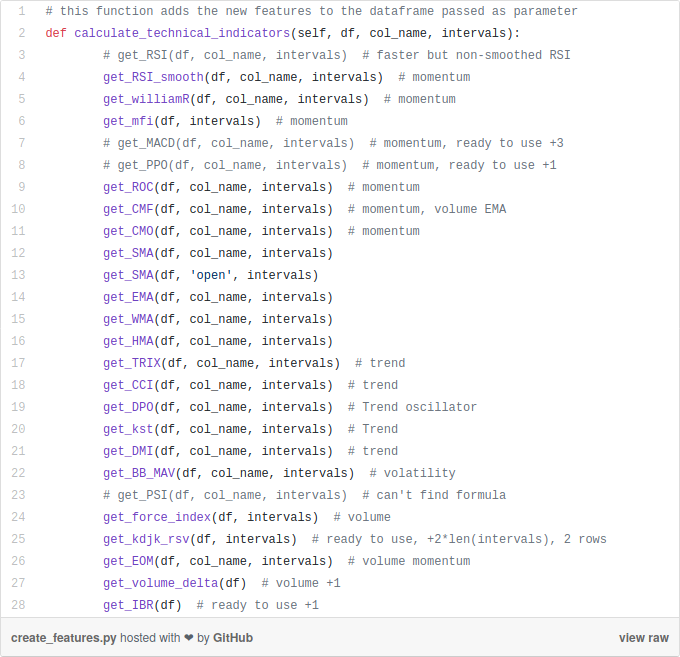

## **Labeling data**

Again the algorithm used in the article is the same as the one used in the paper

**below is how it was implemented in the paper**

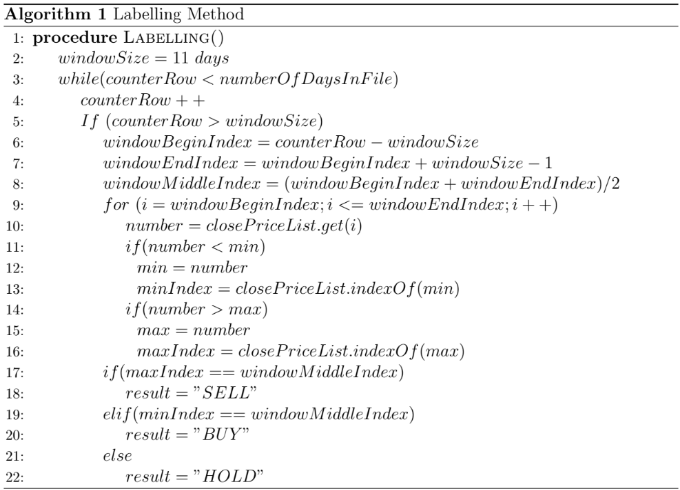

**and in the article**

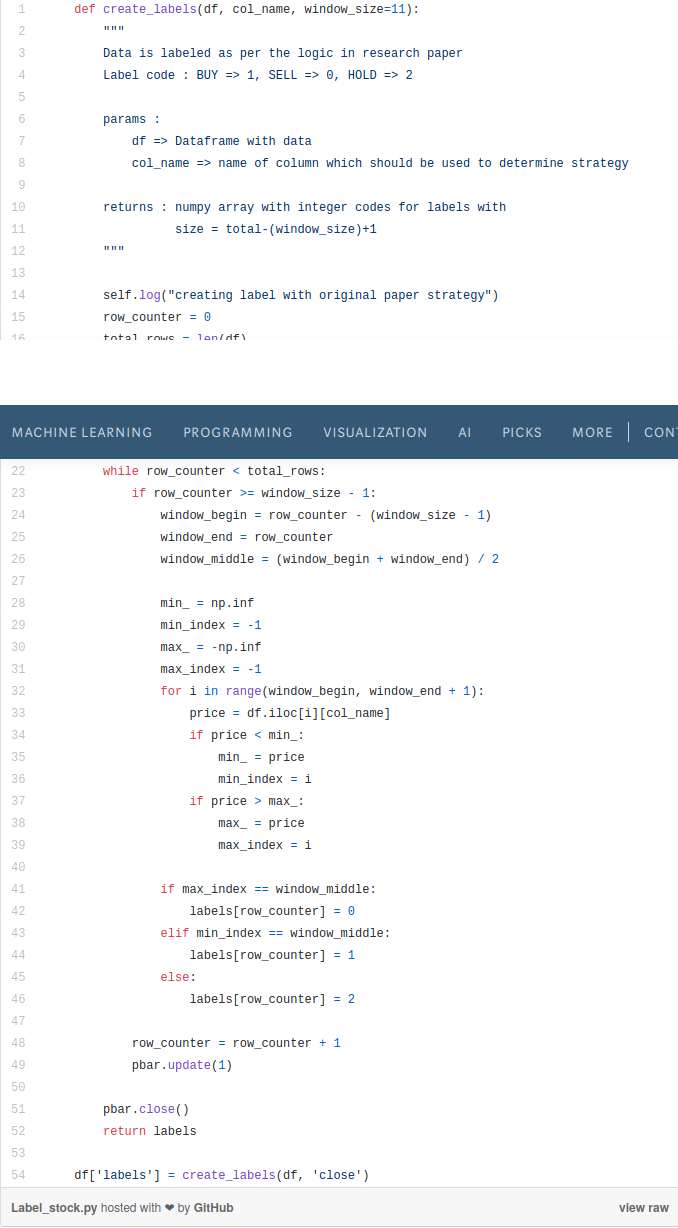

## **After the feature engineering** 

Our data frame will look like this

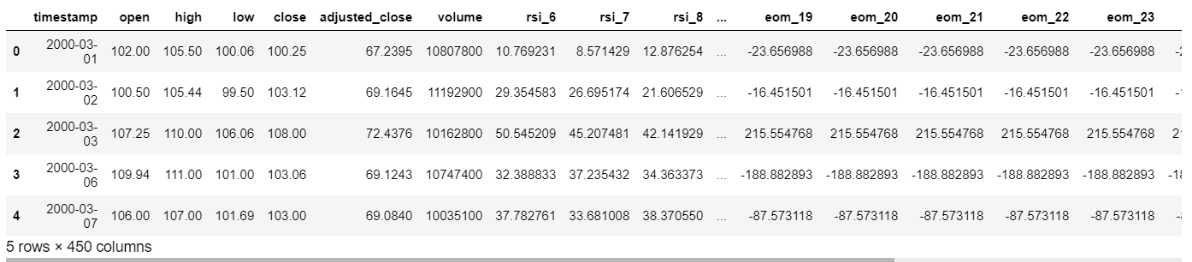

## **Normalization**

The article uses MinMaxScaler from Sklearn to normalize the data between [0, 1] the paper used a range between [-1, 1].

I'm not sure of the difference and need to look into this more.

## **Feature Selection**

From above we can see the type of indicators that were used, from there they were grouped together (momentum, oscillator, etc.)

The author in the article trained many different CNNs and decided the features were not good enough, so he added many more then used some feature selection methods like f_classif and mutual_info_classif from Sklearn chosing high quality features that were common to both.

## **Reshape data into images**

After using feature selection we have tabular data with 225 features and can convert it to images. Below is a snipet of code from the article and how the images look.

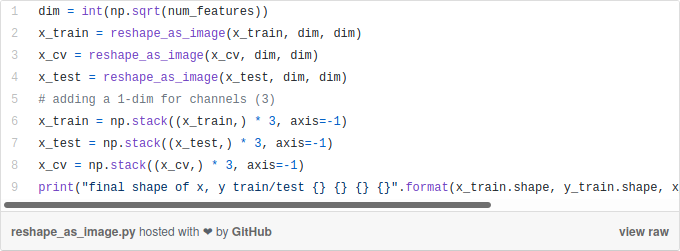

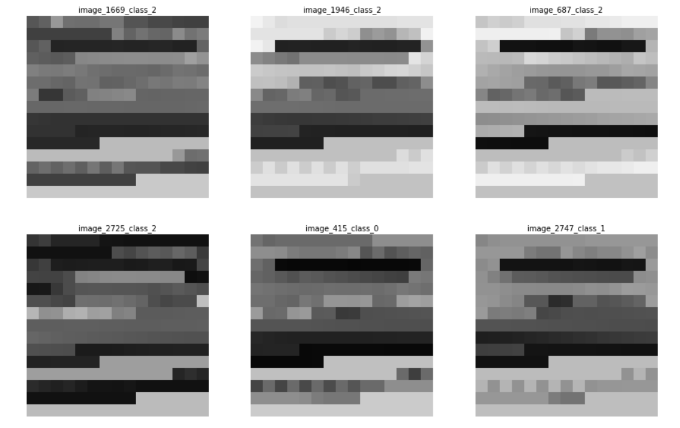

## **Biggest Issue**

The biggest issue now is the class imbalance that we have. Hold is by far the magority class with few Buy and Sell labels. The paper mentions "resampling" but dosent provide details on how so the article author tried oversampling and SMOTE before settling on "sample weights"

## **Training**

Methodology in paper had missing parts and the data proved to large for the article author so he didnt use the sliding window method for training and testing.

**below is the best CNN configuration he found**


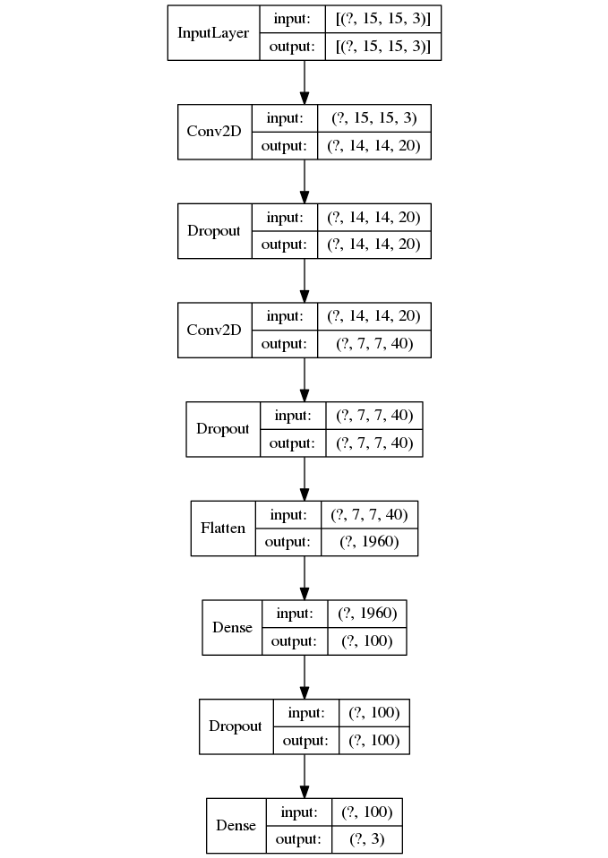

## **Results**

From the article here are the results for Walmart

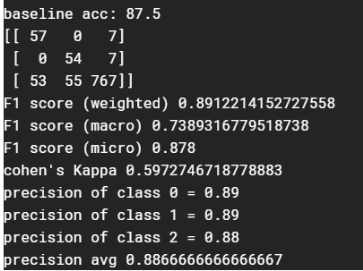

The model seems to be able to identify buy/sell instances but as the paper notes, lots of false entry and exit points are generated. This could be due to the imbalanced classes, in order to catch the Buy and Sell classes there is a tradeoff where flase buy/sells are generated. 